63/63 [==============================] - 0s 756us/step


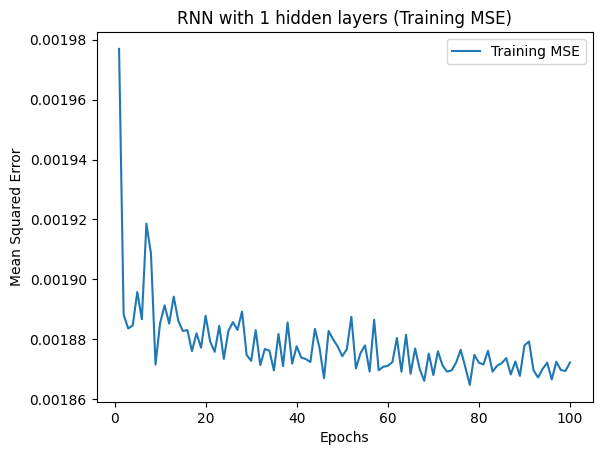

RNN with 1 hidden layers - Mean Squared Error on Test Set: 0.0019491615063528007
RNN with 1 hidden layers - Mean Absolute Error on Test Set: 0.03592776368171474
RNN with 1 hidden layers - R-squared on Test Set: -0.002271916520021122


KeyboardInterrupt: 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Parameters for the AR model
a1, a2, a3 = 0.6, -0.5, -0.2
num_samples = 4000  # Total number of samples
seq_length = 3  # Length of the sequence for AR model
noise_scale = 0.1  # Uniform noise scale

# Generate AR model data
np.random.seed(42)
X = np.zeros(num_samples)
U = np.random.uniform(0, noise_scale, size=num_samples)

for t in range(seq_length, num_samples):
    X[t] = a1 * X[t - 1] + a2 * X[t - 2] + a3 * X[t - 3] + U[t]

# Split data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.5, random_state=42)

# Preprocess the data for RNN
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

def build_and_train_rnn(num_layers, X_train_seq, y_train, X_test_seq, y_test):
    model = tf.keras.Sequential()
    for _ in range(num_layers):
        model.add(tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    X_train_seq = X_train_seq.reshape(-1, seq_length, 1)
    X_test_seq = X_test_seq.reshape(-1, seq_length, 1)

    mse_train_history = []  # To store MSE values during training

    for epoch in range(1,101):  # Number of training epochs
        history = model.fit(X_train_seq, y_train, epochs=1, batch_size=32, verbose=0)  # Train for one epoch
        mse_train = history.history['loss'][0]
        mse_train_history.append(mse_train)

    # Calculate Mean Squared Error (MSE) on test set    
    predictions_test = model.predict(X_test_seq)
    mse_test = np.mean(np.square(predictions_test[:, -1] - y_test))
    
    # Calculate Mean Absolute Error (MAE) on test set
    mae_test = mean_absolute_error(y_test, predictions_test[:, -1])
    
    # Calculate R-squared (R2) on test set
    r2_test = r2_score(y_test, predictions_test[:, -1])

    return mse_train_history, mse_test, mae_test, r2_test

# Split data into training sequences
X_train_seq = create_sequences(X_train, seq_length)
y_train = X_train[seq_length:]

X_test_seq = create_sequences(X_test, seq_length)
y_test = X_test[seq_length:]

# Train and evaluate RNN models with different hidden layers without a validation set
for num_layers in [1, 2, 3]:
    mse_train_history, mse_test, mae_test, r2_test = build_and_train_rnn(num_layers, X_train_seq, y_train, X_test_seq, y_test)
    
    # Plot the epoch-MSE curve during training
    plt.figure()
    plt.plot(range(1, 101), mse_train_history, label='Training MSE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title(f'RNN with {num_layers} hidden layers (Training MSE)')
    plt.legend()
    plt.show()
    
    # Report MSE, MAE, and R2 on the test data
    print(f"RNN with {num_layers} hidden layers - Mean Squared Error on Test Set: {mse_test}")
    print(f"RNN with {num_layers} hidden layers - Mean Absolute Error on Test Set: {mae_test}")
    print(f"RNN with {num_layers} hidden layers - R-squared on Test Set: {r2_test}")


RNN Architecture:

The RNN (Recurrent Neural Network) architecture is designed for sequence data.
<br>
It uses one or more layers of SimpleRNN units for modeling sequential dependencies.

Layer Configuration:

The number of layers is determined by the variable num_layers which can be set to 1, 2, or 3 in the loop.
<br>
Each layer consists of SimpleRNN units with 64 neurons.

Training Configuration:

The model is compiled using the Adam optimizer
The loss function used for training is mean squared error (MSE),MAE (mean absolute error) and R2 (R-square) 

Results:

In all cases, the MSE values are quite low, indicating that the models are making reasonably accurate predictions on the test data.
<br>
The MAE values are also relatively small, suggesting that the models provide good predictions in terms of magnitude.
<br>
An R2 value near 0 suggests that the model does not explain much of the variance in the data. Negative R2 values indicate that the model performs worse than a horizontal line.
<br>
Unfortunately, the R2 values in this case are close to 0 or negative, indicating that the models do not explain much variance in the test data. This suggests that the models may not be capturing the underlying patterns in the data effectively.